<a href="https://www.kaggle.com/code/praneetharao/cifar10-cnn?scriptVersionId=243945087" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


In [2]:
!pip install py7zr
import py7zr

os.makedirs('/kaggle/temp/train', exist_ok=True)
os.makedirs('/kaggle/temp/test', exist_ok=True)

# Extract TRAIN data
with py7zr.SevenZipFile('../input/cifar-10/train.7z', mode='r') as archive_train:
    archive_train.extractall(path='/kaggle/temp/train')

# Extract TEST data
with py7zr.SevenZipFile('../input/cifar-10/test.7z', mode='r') as archive_test:
    archive_test.extractall(path='/kaggle/temp/test')

print("Extraction complete!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 16.1 MB/s eta 0:00:00
Extraction complete!


In [3]:
print("Train files:", len(os.listdir('/kaggle/temp/train/train')))
print("Test files:", len(os.listdir('/kaggle/temp/test/test'))) 

Train files: 50000
Test files: 300000


In [4]:
import pandas as pd

labels_df = pd.read_csv('/kaggle/input/cifar-10/trainLabels.csv')
print(labels_df.head())

   id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile


In [5]:
import numpy as np
from PIL import Image
import os
from tqdm import tqdm

train_dir = '/kaggle/temp/train/train'
x_train = []
y_train = []

for idx, row in tqdm(labels_df.iterrows(), total=labels_df.shape[0]):
    img_id = row['id']
    label = row['label']
    img_path = os.path.join(train_dir, f"{img_id}.png")
    img = Image.open(img_path)
    img = np.array(img)
    x_train.append(img)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape, y_train.shape)

100%|██████████| 50000/50000 [00:16<00:00, 3111.02it/s]


(50000, 32, 32, 3) (50000,)


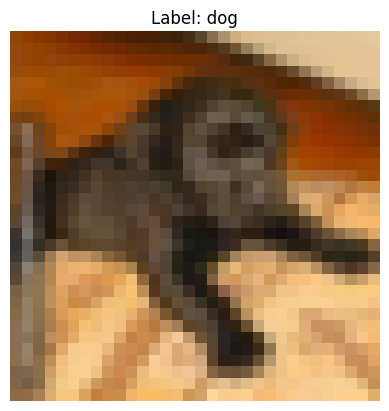

In [6]:
import matplotlib.pyplot as plt

i = 56
plt.imshow(x_train[i])
plt.title(f"Label: {y_train[i]}")
plt.axis('off')
plt.show()

In [7]:
x_train = x_train.astype('float32') / 255.0
print(x_train[1])

[[[0.6039216  0.69411767 0.73333335]
  [0.49411765 0.5372549  0.53333336]
  [0.4117647  0.40784314 0.37254903]
  ...
  [0.35686275 0.37254903 0.2784314 ]
  [0.34117648 0.3529412  0.2784314 ]
  [0.30980393 0.31764707 0.27450982]]

 [[0.54901963 0.627451   0.6627451 ]
  [0.5686275  0.6        0.6039216 ]
  [0.49019608 0.49019608 0.4627451 ]
  ...
  [0.3764706  0.3882353  0.30588236]
  [0.3019608  0.3137255  0.24313726]
  [0.2784314  0.28627452 0.23921569]]

 [[0.54901963 0.60784316 0.6431373 ]
  [0.54509807 0.57254905 0.58431375]
  [0.4509804  0.4509804  0.4392157 ]
  ...
  [0.30980393 0.32156864 0.2509804 ]
  [0.26666668 0.27450982 0.21568628]
  [0.2627451  0.27058825 0.21568628]]

 ...

 [[0.6862745  0.654902   0.6509804 ]
  [0.6117647  0.6039216  0.627451  ]
  [0.6039216  0.627451   0.6666667 ]
  ...
  [0.16470589 0.13333334 0.14117648]
  [0.23921569 0.20784314 0.22352941]
  [0.3647059  0.3254902  0.35686275]]

 [[0.64705884 0.6039216  0.5019608 ]
  [0.6117647  0.59607846 0.50980395]


In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


le = LabelEncoder()
y_train_int = le.fit_transform(y_train)
y_train_onehot = to_categorical(y_train_int, num_classes=10)
print(y_train_onehot.shape)

2025-06-05 17:34:16.815765: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749144857.097393      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749144857.165747      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


(50000, 10)


In [9]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-05 17:34:31.924159: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 478,378 (1.82 MB)

 Trainable params: 478,186 (1.82 MB)

 Non-trainable params: 192 (768.00 B)

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    x_train, y_train_onehot,
    batch_size=64,
    epochs=20,
    validation_split=0.2 
)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 125ms/step - accuracy: 0.2749 - loss: 2.0396 - val_accuracy: 0.4861 - val_loss: 1.4561
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.4685 - loss: 1.4532 - val_accuracy: 0.5712 - val_loss: 1.1881
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 123ms/step - accuracy: 0.5630 - loss: 1.2331 - val_accuracy: 0.6173 - val_loss: 1.0685
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 129ms/step - accuracy: 0.6160 - loss: 1.0979 - val_accuracy: 0.6519 - val_loss: 0.9905
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 128ms/step - accuracy: 0.6514 - loss: 0.9998 - val_accuracy: 0.6603 - val_loss: 0.9526
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.6724 - loss: 0.9360 - val_accuracy: 0.6702 - val_loss: 0.9221
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.6953 - loss: 0.8695 - val_accuracy: 0.7110 - val_loss: 0.8169
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.7081 - loss: 0

In [12]:
test_dir = '/kaggle/temp/test/test'
test_files = sorted(
    [f for f in os.listdir(test_dir) if f.endswith('.png')],
    key=lambda x: int(x.split('.')[0])  # Sort by numeric ID
)

x_test = []
for fname in tqdm(test_files):
    img_path = os.path.join(test_dir, fname)
    img = Image.open(img_path)
    img = np.array(img).astype('float32') / 255.0  # Normalize here
    x_test.append(img)

x_test = np.array(x_test)


# Predict
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)  # Shape: (300000,)

100%|██████████| 300000/300000 [01:52<00:00, 2655.02it/s]


9375/9375 ━━━━━━━━━━━━━━━━━━━━ 148s 16ms/step


In [13]:
predicted_class_names = le.inverse_transform(predicted_labels)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'id': [int(fname.split('.')[0]) for fname in test_files],
    'label': predicted_class_names
})

# Save to CSV
submission_df.to_csv('submission.csv', index=False)